# What factors affecting the London child poverty rate?


##### Programme: MSc Spatial Data Science and Visualisation
##### Module: CASA0006 - Data Science for Spatial Systems
##### Student id: 19035452
##### Word count: 2217+13 figures

## 1. Introduction

With the development of society, the global economy and people's lives have improved significantly, but child poverty has always faced huge challenges. Even Britain, a developed country, and London, an international city, are also facing this thorny problem. The child poverty ratio is getting higher and higher. In the short term, it will bring about children’s education and health problems. In the long term, it will affect the employment and life choices of these children, and even have many negative effects on society. So what are the factors affecting child poverty rate in London? Could the child poverty rate be predicted? This paper aims to clarify the factors affecting children’s poverty in London. These factors are characteristics reflected in London society rather than common in the global environment. We can understand how to alleviate this problem in a more targeted manner in the London area.<br>

Most of the relevant research focused on the national level, and rarely on specific regions or cities. This article focuses on London’s MSOA level data to explore the topic of child poverty. In terms of factors, most of the literature considers the income of the child's parents and the impact factors. However, in the fiercely competitive London, it is difficult for the government to help the parents of their children become more competitive and earn more. Therefore, these conditions are difficult to change. In addition to the basic factors of income, this article also considers some factors that can be changed through the efforts of the society and government, such as the living environment, children and young people’s sub-fields, and considers the characteristics of London such as diverse races.

## 2. Literature Review

1) The status quo of child poverty and its general influencing factors<br>
Of the 26 OECD countries with relevant data, the proportion of poor children in 17 developed countries has increased. And regardless of the commonly used poverty alleviation measures, the situation of children has deteriorated over the last decade. Although each country has a different background, the poverty level of all countries is mainly determined by these three factors: social trends, labor-market conditions and government policies. (Anonymous 2005)( Chen, WH., Corak, M.2008.) In short, income is the most critical factor, but countries with different development situations have their own priorities. For example, developing countries address food and clothing primarily by reducing absolute poverty, while developed countries mainly consider income, well-being and children's health. (White et al.2003) From short to long term, it will bring great negative effects and instability on children themselves and the society. In terms of education, these children have higher absenteeism, and fewer continue to receive education beyond the age of 16. In health, they will abstain from drinking and smoking earlier than their peers.Parents and teachers will see more behavioral problems and personality flaws. These will affect children’s future development, life opportunities, and their perception of themselves and society. We even see that these children account for a higher percentage in convictions, fines, and incarceration. (Department for Work and Pensions Research 2001) (WICKHAM et al.2016)

2) The current situation and characteristics of child poverty in the UK and London<br>
The definition of child poverty in Britain is the proportion of under-16s estimated to live in households with a household income of less than 60% of the median (UNICEF 2013)(Seymour D. 2009). The poverty level of children in the UK is currently very high, and the child poverty rate has started to rise in absolute terms for the first time in almost two decades.(WICKHAM et al.2016) And there are serious regional differences, ranging from 3% in the south and east of England to 10% in London. (MAGADI, M., 2010.) Among all British regions, London has the highest child poverty rate. More than a quarter of children in London live in poverty. The influencing factors can be summarized in the following aspects: first, income and related factors, determine whether parents can rely on income for a living. Such as the education and skill level of the parents, the total family income, and the presence of disabled adults in the family. Second, living costs, housing prices, transportation and childcare costs. Third, the social environment in the area, such as the welfare policy for children and youth, the crime rate, the living environment and the number of part-time jobs. And it found that minority groups, especially children of Asian descent, have higher poverty rates. (Platt 2007) (CPAG 2021) (Greater London Authority 2010)


## 3. Presentation of Data and Data preprocessing

We selected 5 relevant datasets (irrelevant data has been deleted) and integrated them into 983 London-MSOA-level data (ONS). Take child poverty proportion as the response variable, and select factors that can represent the high child poverty rate in London as explanatory variables. The independent variables are mainly 8 factors in 4 aspects, economy (income deprivation affecting children index, house price), social environment (living environment, children and young people sub-domain score), specific population (bame proportion), regional factors (education, health and crime).
Among them, because the house prices in London are quite different, the median is used here.  The median is more representative of the overall level than the average.

<div style="float:left"><img width="900" src="https://github.com/Audrey-chenxi/06-Data-Science-for-Spatial-Systems/blob/main/Data/Figure.png?raw=true" /></div>

### 3.1 Import Library

In [1]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
import scipy as sp
import statsmodels.api as sm
import scipy.stats as sps
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as sklm
import sklearn.cluster as sklc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler

from sklearn import linear_model
from sklearn.linear_model import lasso_path
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import validation_curve

import matplotlib.pyplot as plt
from itertools import cycle
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

### 3.2 Getting the Data

In [2]:
child_poverty_London_MSOA = "https://github.com/Audrey-chenxi/06-Data-Science-for-Spatial-Systems/raw/main/Data/child_poverty_London_MSOA.csv"
df0 = pd.read_csv(child_poverty_London_MSOA, low_memory=False)
print(f"Data frame is {df0.shape[0]:,} x {df0.shape[1]}")
bame_London_MSOA = "https://github.com/Audrey-chenxi/06-Data-Science-for-Spatial-Systems/raw/main/Data/bame_London_MSOA.csv"
df1 = pd.read_csv(bame_London_MSOA, low_memory=False)
print(f"Data frame is {df1.shape[0]:,} x {df1.shape[1]}")
house_price_MSOA = "https://github.com/Audrey-chenxi/06-Data-Science-for-Spatial-Systems/raw/main/Data/house%20price_MSOA.csv"
df2 = pd.read_csv(house_price_MSOA, low_memory=False)
print(f"Data frame is {df2.shape[0]:,} x {df2.shape[1]}")
indices_of_deprivation_England_LSOA = "https://github.com/Audrey-chenxi/06-Data-Science-for-Spatial-Systems/blob/main/Data/indices%20of%20deprivation_LSOA.csv?raw=true"
df3 = pd.read_csv(indices_of_deprivation_England_LSOA, low_memory=False)
print(f"Data frame is {df3.shape[0]:,} x {df3.shape[1]}")
LSOA_MSOA = "https://github.com/Audrey-chenxi/06-Data-Science-for-Spatial-Systems/blob/main/Data/LSOA_MSOA.csv?raw=true"
df4 = pd.read_csv(LSOA_MSOA, low_memory=False)
print(f"Data frame is {df4.shape[0]:,} x {df4.shape[1]}")

Data frame is 983 x 2
Data frame is 983 x 2
Data frame is 7,301 x 2
Data frame is 32,844 x 7
Data frame is 227,759 x 2


### 3.3 Data Join

First, merge all MSOA related data sets (df0, df1, df2) into London MSOA<br>
Second, convert the LSOA data set to MSOA

In [3]:
# Merging two London MSOA files
df1_1 = pd.merge(left=df0, right=df1, how='left', left_on='MSOA11CD', right_on='MSOA11CD')
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSOA11CD            983 non-null    object 
 1   child_poverty_prop  983 non-null    float64
 2   all_bame_prop       983 non-null    float64
dtypes: float64(2), object(1)
memory usage: 30.7+ KB


In [4]:
# Merge and filter MSOA files, leaving only London MSOA
df1_2 = pd.merge(left=df1_1, right=df2, how='left', left_on='MSOA11CD', right_on='MSOA code')
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSOA11CD            983 non-null    object 
 1   child_poverty_prop  983 non-null    float64
 2   all_bame_prop       983 non-null    float64
 3   MSOA code           983 non-null    object 
 4   house price         983 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.1+ KB


In [5]:
df1_2['house price'] = df1_2['house price'].str.replace(',', '').astype(float)
df1_3 = df1_2
df1_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSOA11CD            983 non-null    object 
 1   child_poverty_prop  983 non-null    float64
 2   all_bame_prop       983 non-null    float64
 3   MSOA code           983 non-null    object 
 4   house price         983 non-null    float64
dtypes: float64(3), object(2)
memory usage: 46.1+ KB


In [6]:
df1_3.describe()

,child_poverty_prop,all_bame_prop,house price
count,983.0000,983.0000,983.0000
mean,0.1672,0.3942,"526,463.3723"
std,0.0755,0.1931,"243,318.4074"
min,0.0094,0.0381,"214,000.0000"
25%,0.1060,0.2371,"384,375.0000"
50%,0.1722,0.3735,"465,000.0000"
75%,0.2255,0.5362,"587,500.0000"
max,0.3641,0.9386,"2,850,000.0000"


In [7]:
# Combine LSOA related data collection into MSOA level
df2_1 = pd.merge(left=df3, right=df4, how='left', left_on='LSOA code (2011)', right_on='LSOA11CD')
df2_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171372 entries, 0 to 171371
Data columns (total 9 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   LSOA code (2011)                                                  171372 non-null  object 
 1   Education, Skills and Training Score                              171372 non-null  float64
 2   Health Deprivation and Disability Score                           171372 non-null  float64
 3   Crime Score                                                       171372 non-null  float64
 4   Living Environment Score                                          171372 non-null  float64
 5   Income Deprivation Affecting Children Index (IDACI) Score (rate)  171372 non-null  float64
 6   Children and Young People Sub-domain Score                        171372 non-null  float64
 7   LSOA11CD             

In [8]:
df2_2 = pd.merge(left=df1_3, right=df2_1, how='left', left_on='MSOA code', right_on='MSOA11CD')
df2_3 = df2_2.groupby(['MSOA code'])['Education, Skills and Training Score'].agg(['mean']).reset_index().rename(columns={'mean':'Education',})
df2_4 = df2_2.groupby(['MSOA code'])['Health Deprivation and Disability Score'].agg(['mean']).reset_index().rename(columns={'mean':'Health',})
df2_5 = df2_2.groupby(['MSOA code'])['Crime Score'].agg(['mean']).reset_index().rename(columns={'mean':'Crime',})
df2_6 = df2_2.groupby(['MSOA code'])['Living Environment Score'].agg(['mean']).reset_index().rename(columns={'mean':'Living Environment',})
df2_7 = df2_2.groupby(['MSOA code'])['Income Deprivation Affecting Children Index (IDACI) Score (rate)'].agg(['mean']).reset_index().rename(columns={'mean':'Income',})
df2_8 = df2_2.groupby(['MSOA code'])['Children and Young People Sub-domain Score'].agg(['mean']).reset_index().rename(columns={'mean':'CYP',})

df2_9 = pd.merge(left=df2_3, right=df2_4, how='left', on='MSOA code')
df2_9 = pd.merge(left=df2_9, right=df2_5, how='left', on='MSOA code')
df2_9 = pd.merge(left=df2_9, right=df2_6, how='left', on='MSOA code')
df2_9 = pd.merge(left=df2_9, right=df2_7, how='left', on='MSOA code')
df2_9 = pd.merge(left=df2_9, right=df2_8, how='left', on='MSOA code')
df2_9.head()

,MSOA code,Education,Health,Crime,Living Environment,Income,CYP
0,E02000001,4.7197,-0.7076,-1.6666,38.7227,0.0496,-1.0045
1,E02000002,30.2599,0.2203,0.4431,20.0390,0.2520,0.3109
2,E02000003,17.8787,-0.0137,0.5447,30.3942,0.1787,-0.2371
3,E02000004,22.5867,0.0249,0.1238,20.5245,0.1832,-0.0513
4,E02000005,27.2438,0.0993,0.6167,35.8000,0.1978,0.0228


### 3.4 Data Summarise

Get all datasets of London MSOA level

In [9]:
df3_1 = pd.merge(left=df1_3, right=df2_9, how='left', on='MSOA code')
df3_1.head()

,MSOA11CD,child_poverty_prop,all_bame_prop,MSOA code,house price,Education,Health,Crime,Living Environment,Income,CYP
0,E02000001,0.0526,0.2137,E02000001,"919,325.0000",4.7197,-0.7076,-1.6666,38.7227,0.0496,-1.0045
1,E02000002,0.2739,0.3501,E02000002,"350,000.0000",30.2599,0.2203,0.4431,20.0390,0.2520,0.3109
2,E02000003,0.2467,0.4539,E02000003,"348,000.0000",17.8787,-0.0137,0.5447,30.3942,0.1787,-0.2371
3,E02000004,0.2020,0.1902,E02000004,"350,000.0000",22.5867,0.0249,0.1238,20.5245,0.1832,-0.0513
4,E02000005,0.2319,0.3373,E02000005,"330,000.0000",27.2438,0.0993,0.6167,35.8000,0.1978,0.0228


In [10]:
CP = df3_1.drop(columns=['MSOA code'], axis=1)
CP = CP.drop(columns=['MSOA11CD'], axis=1)
CP = CP.rename(columns={"child_poverty_prop":"Child Poverty","all_bame_prop":"Bame","house price":"House Price",})
CP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Child Poverty       983 non-null    float64
 1   Bame                983 non-null    float64
 2   House Price         983 non-null    float64
 3   Education           983 non-null    float64
 4   Health              983 non-null    float64
 5   Crime               983 non-null    float64
 6   Living Environment  983 non-null    float64
 7   Income              983 non-null    float64
 8   CYP                 983 non-null    float64
dtypes: float64(9)
memory usage: 76.8 KB


In [11]:
CP.head()

,Child Poverty,Bame,House Price,Education,Health,Crime,Living Environment,Income,CYP
0,0.0526,0.2137,"919,325.0000",4.7197,-0.7076,-1.6666,38.7227,0.0496,-1.0045
1,0.2739,0.3501,"350,000.0000",30.2599,0.2203,0.4431,20.0390,0.2520,0.3109
2,0.2467,0.4539,"348,000.0000",17.8787,-0.0137,0.5447,30.3942,0.1787,-0.2371
3,0.2020,0.1902,"350,000.0000",22.5867,0.0249,0.1238,20.5245,0.1832,-0.0513
4,0.2319,0.3373,"330,000.0000",27.2438,0.0993,0.6167,35.8000,0.1978,0.0228


In [12]:
CP.describe()

,Child Poverty,Bame,House Price,Education,Health,Crime,Living Environment,Income,CYP
count,983.0000,983.0000,983.0000,983.0000,983.0000,983.0000,983.0000,983.0000,983.0000
mean,0.1672,0.3942,"526,463.3723",13.0640,-0.3791,0.2604,29.2455,0.1732,-0.3953
std,0.0755,0.1931,"243,318.4074",8.6800,0.5980,0.4445,9.0568,0.0810,0.4570
min,0.0094,0.0381,"214,000.0000",0.1932,-3.0468,-1.6666,7.7044,0.0081,-1.8165
25%,0.1060,0.2371,"384,375.0000",6.3145,-0.7778,-0.0312,22.8794,0.1099,-0.6647
50%,0.1722,0.3735,"465,000.0000",11.5676,-0.2922,0.2942,29.2036,0.1673,-0.3405
75%,0.2255,0.5362,"587,500.0000",18.1931,0.0774,0.5691,35.0504,0.2367,-0.0868
max,0.3641,0.9386,"2,850,000.0000",44.7985,0.9410,1.5721,60.7304,0.4125,0.7578


In [13]:
CP.to_csv(r'xixizi.csv')

### 3.5 Data Plot

Although the data has a small number of outliers, it is a complete data that includes all MSOAs in London that are not missing. And there is a big gap in some aspects of the London, such as housing prices, but it does not mean that the data is abnormal or wrong. This model is not as sensitive to outliers as logistic regression, so they are not deleted.

Text(0.5, 1.0, 'Figure 2: Box plot')

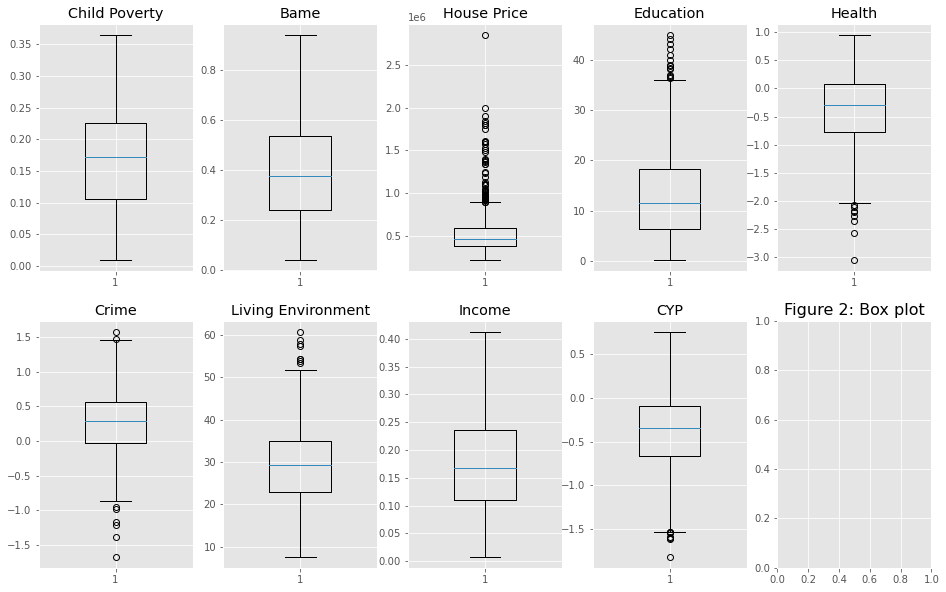

In [14]:
figure ,axes =plt.subplots(2,5,figsize=(16,10))
axes[0][0].boxplot(CP['Child Poverty'],widths = 0.4)
axes[0][0].set_title('Child Poverty')
axes[0][1].boxplot(CP['Bame'],widths = 0.4)
axes[0][1].set_title('Bame')
axes[0][2].boxplot(CP['House Price'],widths = 0.4)
axes[0][2].set_title('House Price')
axes[0][3].boxplot(CP.Education,widths = 0.4)
axes[0][3].set_title('Education')
axes[0][4].boxplot(CP.Health,widths = 0.4)
axes[0][4].set_title('Health')
axes[1][0].boxplot(CP.Crime,widths = 0.4)
axes[1][0].set_title('Crime')
axes[1][1].boxplot(CP['Living Environment'],widths = 0.4)
axes[1][1].set_title('Living Environment')
axes[1][2].boxplot(CP.Income,widths = 0.4)
axes[1][2].set_title('Income')
axes[1][3].boxplot(CP.CYP,widths = 0.4)
axes[1][3].set_title('CYP')
plt.title('Figure 2: Box plot', fontsize=16)

## 4. Methodology

Because of the number of words, this article does not introduce methodology in detail, but integrates the corresponding theoretical ideas and principles into the introduction and analysis. We used linear regression, regression tree and random forest to fit the model, study and predict the child poverty rate. And in linear regression, two methods(VIF and Lasso) are used to deal with multiple collinearity. In the two models of machine learning, we try to continuously optimize the model by adjusting hyperparameters and cross-validation method. These two methods do not perform collinearity processing, because the purpose here is to make predictions to improve accuracy. The collinearity or multiple collinearity of the variables will not have a great negative effect. <br>

In this process, the advantages and disadvantages of different methods are analyzed and compared, different models and methods are viewed critically, and the model suitable for this dataset is finally selected.

### 4.1 Linear Regression

First, create a matrix to detect the collinearity between attributes, because two highly related variables in the regression have a lot of duplicate information, which causes the collinearity problem. Second, perform the first fitting, and third, test the P value, and re-fit to the P value all meet the requirements. Fourth, perform the VIF test. Fifth, after confirming the final model, we analyze residuals. Here we select the more important residuals and fit graphs and use the histogram, P-P and Q-Q plots as auxiliary references. Sixth, use Lasso's method to re-examine the selection of variables to see if it can improve the prediction accuracy and interpretability of the regression model. (R. Muthukrishnan and R. Rohini 2016)

### 4.1.1 Correlation Matrix between independent variables
This matrix shows the correlation between predictor variables

Text(0.5, 1.0, 'Figure 3: Correlation Matrix')

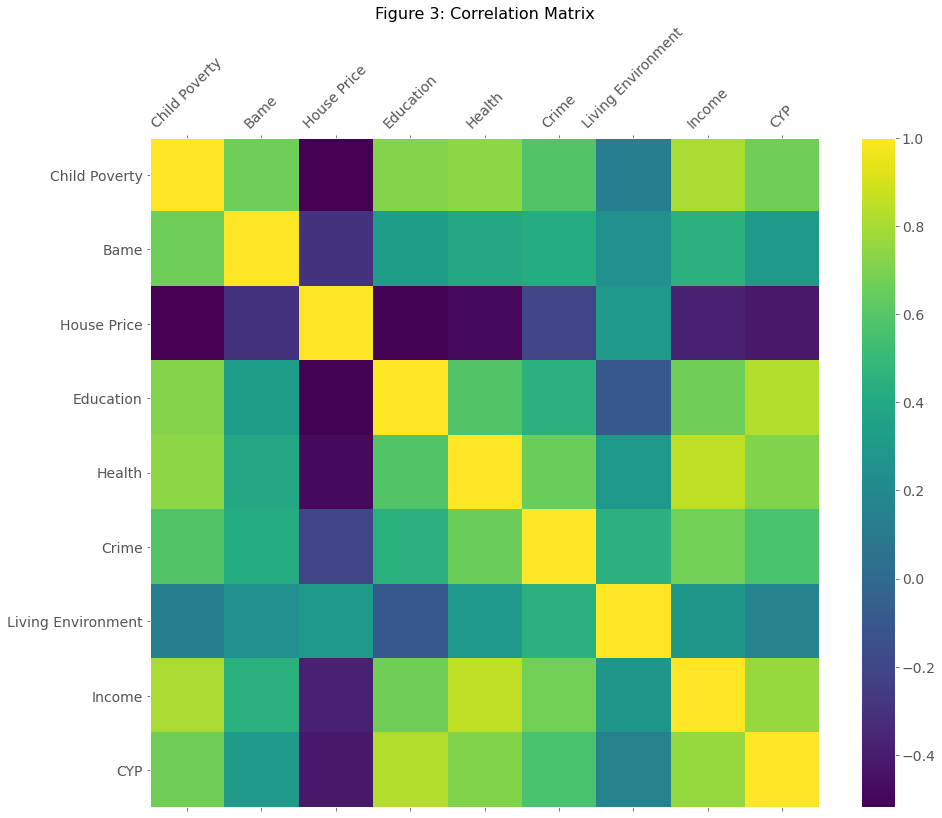

In [15]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(15, 12))
plt.matshow(CP.corr(), fignum=f.number)
plt.xticks(range(CP.shape[1]), CP.columns, fontsize=14, rotation=45)
plt.yticks(range(CP.shape[1]), CP.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Figure 3: Correlation Matrix', fontsize=16)

### 4.1.2 First fit

The P-value of crime and living environment exceeds 0.05. This shows that these two factors have no significant relationship with child poverty and are not in line with expectations, so these two variables are deleted.

In [16]:
CP0=copy.deepcopy(CP)

In [17]:
CP0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Child Poverty       983 non-null    float64
 1   Bame                983 non-null    float64
 2   House Price         983 non-null    float64
 3   Education           983 non-null    float64
 4   Health              983 non-null    float64
 5   Crime               983 non-null    float64
 6   Living Environment  983 non-null    float64
 7   Income              983 non-null    float64
 8   CYP                 983 non-null    float64
dtypes: float64(9)
memory usage: 76.8 KB


In [18]:
CP0.head()

,Child Poverty,Bame,House Price,Education,Health,Crime,Living Environment,Income,CYP
0,0.0526,0.2137,"919,325.0000",4.7197,-0.7076,-1.6666,38.7227,0.0496,-1.0045
1,0.2739,0.3501,"350,000.0000",30.2599,0.2203,0.4431,20.0390,0.2520,0.3109
2,0.2467,0.4539,"348,000.0000",17.8787,-0.0137,0.5447,30.3942,0.1787,-0.2371
3,0.2020,0.1902,"350,000.0000",22.5867,0.0249,0.1238,20.5245,0.1832,-0.0513
4,0.2319,0.3373,"330,000.0000",27.2438,0.0993,0.6167,35.8000,0.1978,0.0228


In [19]:
model0 = CP0.drop('Child Poverty', axis=1)
OLS_out = sm.OLS(endog=CP0[['Child Poverty']], exog=sm.add_constant(model0)).fit()
OLS_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Child Poverty   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     603.9
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:29:53   Log-Likelihood:                 2023.2
No. Observations:                 983   AIC:                            -4028.
Df Residuals:                     974   BIC:                            -3984.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0342      0.008      4.049      0.000       0.018       0.051
Bame                   0.1333      0.006     21.513      0.000       0.121       0.145
House Price        -2.504e-08   5.76e-09     -4.349      0.000   -3.63e-08   -1.37e-08
Education              0.0028      0.000     11.943      0.000       0.002       0.003
Health                 0.0191      0.004      5.288      0.000       0.012       0.026
Crime                  0.0013      0.003      0.379      0.705      -0.005       0.008
Living Environment    -0.0002      0.000     -1.252      0.211      -0.001       0.000
Income                 0.3517      0.028     12.573      0.000       0.297       0.407
CYP                   -0.0215      0.005     -4.567      0.000      -0.031      -0.012
==============================================================================
Omnibus:                       29.683   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.027
Skew:                           0.168   Prob(JB):                     1.52e-13
Kurtosis:                       4.152   Cond. No.                     1.67e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.1.3 P-value 

In [20]:
# Delete variables with a P-value greater than 0.05 ('Crime' and ’Living Environment')
model1 = CP0.drop(['Child Poverty','Crime','Living Environment'], axis=1)
OLS_out = sm.OLS(endog=CP0[['Child Poverty']], exog=sm.add_constant(model1)).fit()
OLS_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Child Poverty   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     805.4
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:29:53   Log-Likelihood:                 2022.4
No. Observations:                 983   AIC:                            -4031.
Df Residuals:                     976   BIC:                            -3997.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0289      0.007      3.958      0.000       0.015       0.043
Bame            0.1315      0.006     22.388      0.000       0.120       0.143
House Price -2.809e-08   5.11e-09     -5.496      0.000   -3.81e-08   -1.81e-08
Education       0.0029      0.000     13.389      0.000       0.003       0.003
Health          0.0183      0.003      5.300      0.000       0.011       0.025
Income          0.3514      0.028     12.751      0.000       0.297       0.405
CYP            -0.0228      0.005     -4.989      0.000      -0.032      -0.014
==============================================================================
Omnibus:                       27.926   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.688
Skew:                           0.148   Prob(JB):                     8.08e-13
Kurtosis:                       4.128   Cond. No.                     1.64e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.1.4 VIF 

It is found that the VIF of income is 5.07, and the other variables are all lower than 5. Income is not processed here, because although vif is less than 5 is the result we expect, it is acceptable to be less than 10 and will not have a major impact on the model.(Neter, J., Wasserman, W., & Kutner, M. H. 1985) At the same time, we can know from the above that income does slightly affect other factors and is an important factor in this model.

In [21]:
variables = OLS_out.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[54.455028288753674,
 1.3109177473067188,
 1.5764641750993287,
 3.6863546461238412,
 4.324448238570784,
 5.076770100316441,
 4.455723367198019]

### 4.1.5 Residual test analysis

It can be seen that the overall residual distribution of Residuals vs Fitte plot is relatively uniform, and there is no obvious non-linear relationship. There is only one outlier among the many data. It is guessed here that the difference in housing prices may have a greater impact. But this effect is real and there is no wrong data, and in the 983 data, there is only this slightly biased point, which does not affect the overall model effect. In order to ensure that the partial regression coefficient of the model is valid for the t value and the F value of the model, we conducted a normality test. It is found that the three related graphs (histogram, P-P and Q-Q graph) show a normal distribution trend, and the line y=x can be basically fitted. The above test basically shows that this model is meaningful and effective.

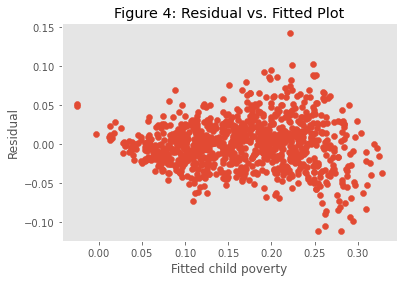

In [22]:
plt.scatter(OLS_out.fittedvalues, OLS_out.resid)
# adding title and labels
plt.xlabel('Fitted child poverty')
plt.ylabel('Residual')
plt.title('Figure 4: Residual vs. Fitted Plot')
plt.show()

(array([  6.,  19.,  90., 255., 352., 181.,  59.,  17.,   3.,   1.]),
 array([-3.62455025, -2.79596936, -1.96738846, -1.13880756, -0.31022666,
         0.51835424,  1.34693513,  2.17551603,  3.00409693,  3.83267783,
         4.66125873]),
 <BarContainer object of 10 artists>)

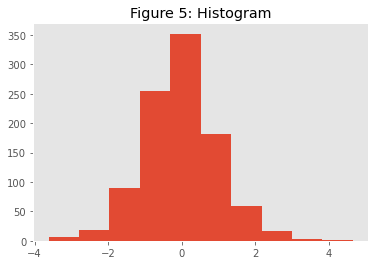

In [23]:
student_resid = sm.regression.linear_model.OLSResults.outlier_test(OLS_out)
plt.title('Figure 5: Histogram') 
plt.hist(student_resid.student_resid)

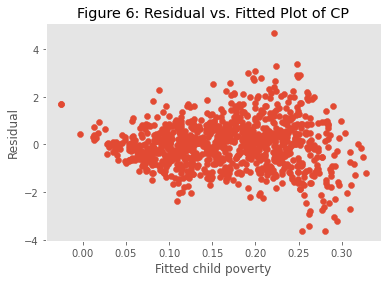

In [24]:
# Exclude those greater than 3
student_resid3 = sm.regression.linear_model.OLSResults.outlier_test(OLS_out)
plt.scatter(OLS_out.fittedvalues, student_resid3.student_resid)
plt.xlabel('Fitted child poverty')
plt.ylabel('Residual')
plt.title('Figure 6: Residual vs. Fitted Plot of CP')
plt.show()

Text(0.5, 1.0, 'Figure 8:Q-Q')

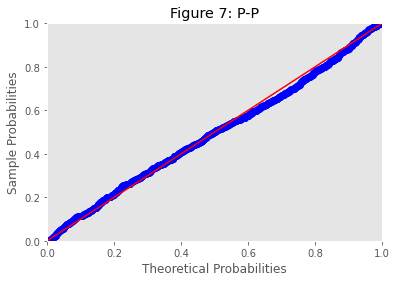

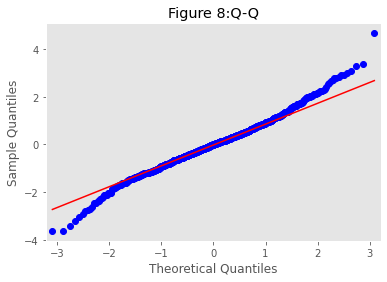

In [25]:
pp_qq_plot = sm.ProbPlot(student_resid3.student_resid)
pp_qq_plot.ppplot(line = '45')
plt.title('Figure 7: P-P')

pp_qq_plot.qqplot(line = 'q')
plt.title('Figure 8:Q-Q')

### 4.1.6 Lasso

Since our lasso model score is 0, this means that the lasso model cannot fit the relationship between the independent variable and the dependent variable very well. In addition, the plot path of the lasso is not very suitable.

In [26]:
# increase the max_iter to guarantee convergence
lasso_model = linear_model.Lasso(max_iter=10e7, normalize=True)
response_data = CP0[['Child Poverty']]
predictors_data = CP0.drop(columns=['Child Poverty'], axis=1)
lasso_model.fit(X=predictors_data, y=response_data)

Lasso(max_iter=100000000.0, normalize=True)

In [27]:
lasso_model.score(X=predictors_data, y=response_data)

0.0

In [28]:
# print(lasso_model.coef_)
df_coef_lasso = pd.DataFrame({"var":predictors_data.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                  var                                     coef
0                Bame                                   0.0000
1         House Price                                  -0.0000
2           Education                                   0.0000
3              Health                                   0.0000
4               Crime                                   0.0000
5  Living Environment                                   0.0000
6              Income                                   0.0000
7                 CYP                                   0.0000


(-1.25, 4.25, -0.0015446081682844337, 0.032436771533973105)

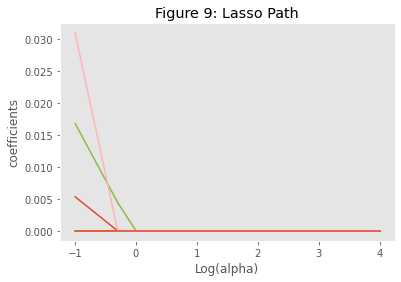

In [29]:
predictors_data_standardised = predictors_data/predictors_data.std(axis=0)

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data, response_data, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data_standardised, response_data.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000], fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Figure 9: Lasso Path')
plt.axis('tight')

### 4.2 Regression Tree

The regression tree may be over-fitting due to the model setting. Here two methods are used to continuously optimize max_depth, and try to train to the best state.

In [30]:
# We apply train_test_split twice to obtain the three train, dev and test sets
y = CP0[['Child Poverty']]
X = CP0.drop(columns=['Child Poverty'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2020)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)



(688, 8)
(147, 8)
(148, 8)


In [31]:
reg_tree = DecisionTreeRegressor(random_state=0,max_depth=8)
reg_tree.fit(X_train, y_train.values.ravel())
reg_tree.score(X=X_train, y=y_train)

0.9596911100160401

In [32]:
reg_tree.score(X=X_val, y=y_val)

0.7759586936214339

The first random forest has a much lower bias than liner regression but still suffers from some variance.

### 4.2.1 Optimise hyperparameters of the ML model

In [33]:
# number of trees to tune
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# process of tune the number of trees
max_score = 0
best_depth = None
for t in depth:
    m = DecisionTreeRegressor(random_state=0,max_depth=t).fit(X_train,y_train)
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_depth = t

In [34]:
max_score

0.7962751000054221

In [35]:
best_depth

5

In [36]:
rt_final = DecisionTreeRegressor(random_state=0,max_depth=best_depth)
rt_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [37]:
print('The score on the training data:')
print(rt_final.score(X_train, y_train))
print('The score on the development data:')
print(rt_final.score(X_val, y_val))

The score on the training data:
0.8786617683119512
The score on the development data:
0.7962751000054221


### 4.2.2 Cross-validation

In [38]:
# values of n_estimators
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
rt = DecisionTreeRegressor()

clt = model_selection.GridSearchCV(rt, parameters)

clt.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clt.best_params_)
print ("The best score is: ")
print (clt.best_score_)

The best parameter value is: 
{'max_depth': 5}
The best score is: 
0.7827273021195795


In [39]:
max_depth_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

train_scores, valid_scores = validation_curve(estimator=DecisionTreeRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

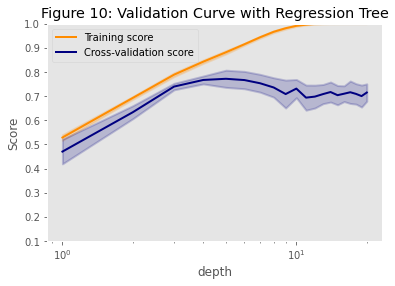

In [40]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 10: Validation Curve with Regression Tree")
plt.xlabel(r"depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
#plt.xlim(1, 20)
lw = 2
plt.semilogx(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [41]:
rt_final.score(X_test, y_test)

0.8007075991222214

Feature: 0, Score: 0.15432
Feature: 1, Score: 0.02055
Feature: 2, Score: 0.63300
Feature: 3, Score: 0.00293
Feature: 4, Score: 0.00824
Feature: 5, Score: 0.00044
Feature: 6, Score: 0.16909
Feature: 7, Score: 0.01144


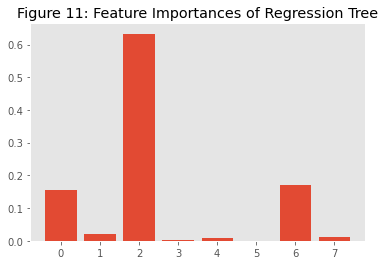

In [44]:
importance = rt_final.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Figure 11: Feature Importances of Regression Tree')
plt.show()

### 4.3 Random Forest

In [45]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train.values.ravel())
rf.score(X_train, y_train)

0.9797781211554115

In [46]:
rf.score(X_val, y_val)

0.8281201372464486

### 4.3.1 Optimise hyperparameters of the ML model

In [47]:
# number of trees to tune
no_trees = [10,20,30,40,50,70,100,150,200]

# process of tune the number of trees
max_score = 0
best_no_trees = None
for t in no_trees:
    m = RandomForestRegressor(n_estimators=t).fit(X_train,y_train.values.ravel())
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_no_trees = t

In [48]:
max_score

0.83450562999891

In [49]:
best_no_trees

70

In [50]:
rf_final = RandomForestRegressor(n_estimators=best_no_trees)
rf_final.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=70)

In [51]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9782762353809068
The score on the development data:
0.8287929079341021


### 4.3.2 Cross-validation

In [52]:
# values of n_estimators
parameters = {'n_estimators':[10,20,30,40,50,70,100,150,200]}
rf = RandomForestRegressor()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train, y_train.values.ravel())

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 70}
The best score is: 
0.8507869969036388


In [53]:
n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train.values.ravel(),
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

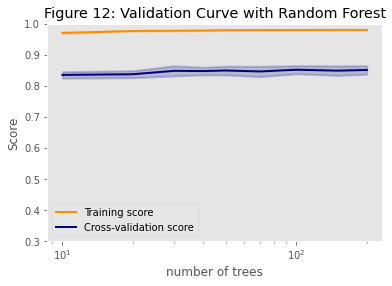

In [54]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 12: Validation Curve with Random Forest")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.3, 1.0)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [55]:
rf_final.score(X_test, y_test)

0.8395026731274952

Feature: 0, Score: 0.13682
Feature: 1, Score: 0.02711
Feature: 2, Score: 0.47982
Feature: 3, Score: 0.05165
Feature: 4, Score: 0.02369
Feature: 5, Score: 0.01375
Feature: 6, Score: 0.24228
Feature: 7, Score: 0.02488


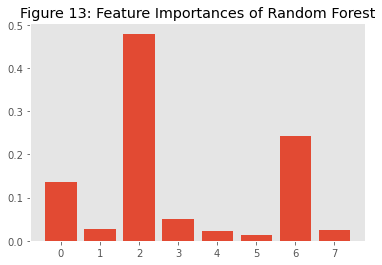

In [56]:
importance = rf_final.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Figure 13: Feature Importances of Random Forest')
plt.show()

### 5.Results & Discussion

We sorted out the key data of the three methods and found that although the scores have small differences, they are still similar overall, but the order of independent variable coefficients is different. In the linear regression model, the first four coefficients are income, bame, CYP, and health. Although the linear regression sequences of the two machine learning models are different, they are very similar. The top 3 are education, income, and bame.

<div style="float:left"><img width="900" src="https://github.com/Audrey-chenxi/06-Data-Science-for-Spatial-Systems/blob/main/Data/Figure13.png?raw=true" /></div>

It can be known from the linear regression model that this model explains 83.1% of the changes in the London children poverty proportion. The adjusted model VIF is in a reasonable range, so there is no need to worry about multicollinearity. P-values are all less than 0.05, indicating that these 6 variables have a strong correlation with child poverty. Among them, income, bame, health and education are positively correlated, while housing prices and CYP are negatively correlated. It is worth noting that income affects children’s scores and bame increase an unit the child poverty rate by 35.14% and 13.15% respectively. At the same time, the effect of random forest is slightly better than linear regression, and the guess here may be nonlinear. But because the gap is small and the dataset is small, the above guess cannot be affirmed.<br>

The regression tree and the random forest have the same core principles. We can see that the random forest scores higher because it has more weighted averages or arithmetic averages than weighted trees do. From the optimization results of regression tree model, we can get the best prediction result when the depth is 5, and the probability of correct prediction is 80.07%.At the same time, when n_estimators were 150, the optimal prediction for random forests was 83.82%.<br>

This article also has some limitations. If we make the following improvements, we may get better results. First of all, from the point of view of independent variables, some specific data sets relating to parents are missing, such as: parents’ education level, ratio of single-parent families. Secondly, for the machine learning of the latter two methods, the amount of data is too small to be perfectly trained, and it is impossible to confirm whether it is the maximum fit. Third, this article does not cover a small number of outliers, because some data are indeed high due to regional differences, rather than data errors. If improvements can be made in this area, there will be more accurate fitting.

### 6.Conclusion
Child poverty is unacceptable, but it is not inevitable. With appropriate support, help and opportunities, some children can escape poverty. (Greater London Authority 2010) The overall difference is that the models and methods can know that income, bame, CYP and education all have a relatively large impact on children’s poverty in London. The government and society have made certain efforts in this regard, such as formulating special welfare policies, financially providing family subsidies, and cooperating with schools to provide free education. (Greater London Authority 2021) (Greater London Authority 2021) But as a result, we hope that certain groups of people can get help. For example, bame children can get basic help like food and clothes, and after ensuring their basic life, provide them with free education according to the existing policies. Child poverty is a long-term and arduous challenge that requires continuous efforts from all sectors of society to enable children to grow in a better environment. At the same time, they believe that adults will create a better London and a better world.

### References
- Anonymous 2005. CHILD POVERTY IN RICH COUNTRIES: Proportion of children living in overty continues to increase. CCPA Monitor, 12(1), pp. 12-14.
- Chen, WH., Corak, M.2008. Child poverty and changes in child poverty. Demography 45, 537–553.
- UNICEF 2013 . Child well-being in rich countries. A comparative overview. United Nations Children’s Fund (UNICEF).ISSN: 1605-7317                                            
- Seymour D. 2009. What is meant by ‘poverty’? Reporting poverty in UK- A national guide for journalisms[online]. Joseph Rowntree Foundation. Available From: http://www.jrf.org.uk/ publications/reporting-poverty-uk-practical-guide-journalists
- Howard White , Jennifer Leavy & Andrew Masters (2003). Comparative Perspectives on Child Poverty: A review of poverty measures. Journal of Human Development, 4:3, 379-396, DOI: 10.1080/1464988032000125755
- WICKHAM, S., ANWAR, E., BARR, B., LAW, C. and TAYLOR-ROBINSON, D., 2016. Poverty and child health in the UK: using evidence for action .Archives of Disease in Childhood, 101(8), pp. 759.
- Department for Work and Pensions Research 2001. LINKING CHILD POVERTY AND CHILD OUTCOMES: EXPLORING DATA AND RESEARCH STRATEGIES. Department for Work and Pensions Research Working Paper No 1.
- MAGADI, M., 2010. Risk Factors for Severe Child Poverty in the UK. Journal of social policy, 39, pp. 297-316.
- Lucinda Platt (2007). CHILD POVERTY, EMPLOYMENT AND ETHNICITY IN THE UK: THE ROLE AND LIMITATIONS OF POLICY. European Societies. 9:2, 175-199, DOI: 10.1080/14616690701217809
- CPAG 2021. CHILD POVERTY IN LONDON FACTS[online].CHILD POVERTV ACTION GROUP.Available from: https://cpag.org.uk/child-poverty-london-facts
- Greater London Authority 2010. The London Health Inequalities Strategy. Greater London Authority. ISBN 978-1-84781-349-7
- R. Muthukrishnan and R. Rohini 2016.LASSO: A feature selection technique in predictive modeling for machine learning.2016 IEEE International Conference on Advances in Computer Applications (ICACA). pp. 18-20.
- Neter, J., Wasserman, W., & Kutner, M. H. 1985. Applied linear statistical models: regression, analysis of variance, and experimental designs (2nd ed.). Homewood. Illinois: R. D. Irwin.
- Greater London Authority 2010. The London Health Inequalities Strategy. Greater London Authority. ISBN 978-1-84781-349-7
- Greater London Authority 2021.[What we do Communities Tacking child poverty through schools online]. Greater London Authority. Available From:https://www.london.gov.uk/what-we-do/communities/tacking-child-poverty-through-schools.